In [313]:
import pdf2image
import numpy as np
import layoutparser as lp
import torchvision.ops.boxes as bops
import torch

In [314]:
def set_coordinate(data):

  x1 = data.block.x_1
  y1 = data.block.y_1
  x2 = data.block.x_2
  y2 = data.block.y_2

  return torch.tensor([[x1, y1, x2, y2]], dtype=torch.float)


def check_intersection(block_1, block_2):
    
    bb1 = set_coordinate(block_1)
    bb2 = set_coordinate(block_2)

    iou = bops.box_iou(bb1, bb2)

    if iou.tolist()[0][0] != 0:
        return True
    
    else :
        return False
    
    
def union(layout_result):
    
    for layout_i in layout_result:
        for layout_j in layout_result:
            if layout_i == layout_j == layout_result[-1]:
                return layout_result
            if layout_i != layout_j:
                if check_intersection(layout_i, layout_j) == True:
                    layout_result.insert(layout_result.index(layout_i),layout_i.union(layout_j,strict=False))
                    layout_result.remove(layout_i)
                    layout_result.remove(layout_j)
                    return union(layout_result)    

In [364]:
pdf_file = '/home/socrates/2022_PFE/cv4.pdf'
img = np.asarray(pdf2image.convert_from_path(pdf_file)[0])

In [365]:
model1 = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.3],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout_result1 = model1.detect(img)

/home/socrates/.local/lib/python3.8/site-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [373]:
model2 = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.1],
                                 label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"})
layout_result2 = model2.detect(img)

In [380]:
layout_result1 = lp.Layout([b for b in layout_result1 if b.type in ('Text','Title')])
layout_result2 = lp.Layout([b for b in layout_result2 if b.type == 'TextRegion'])

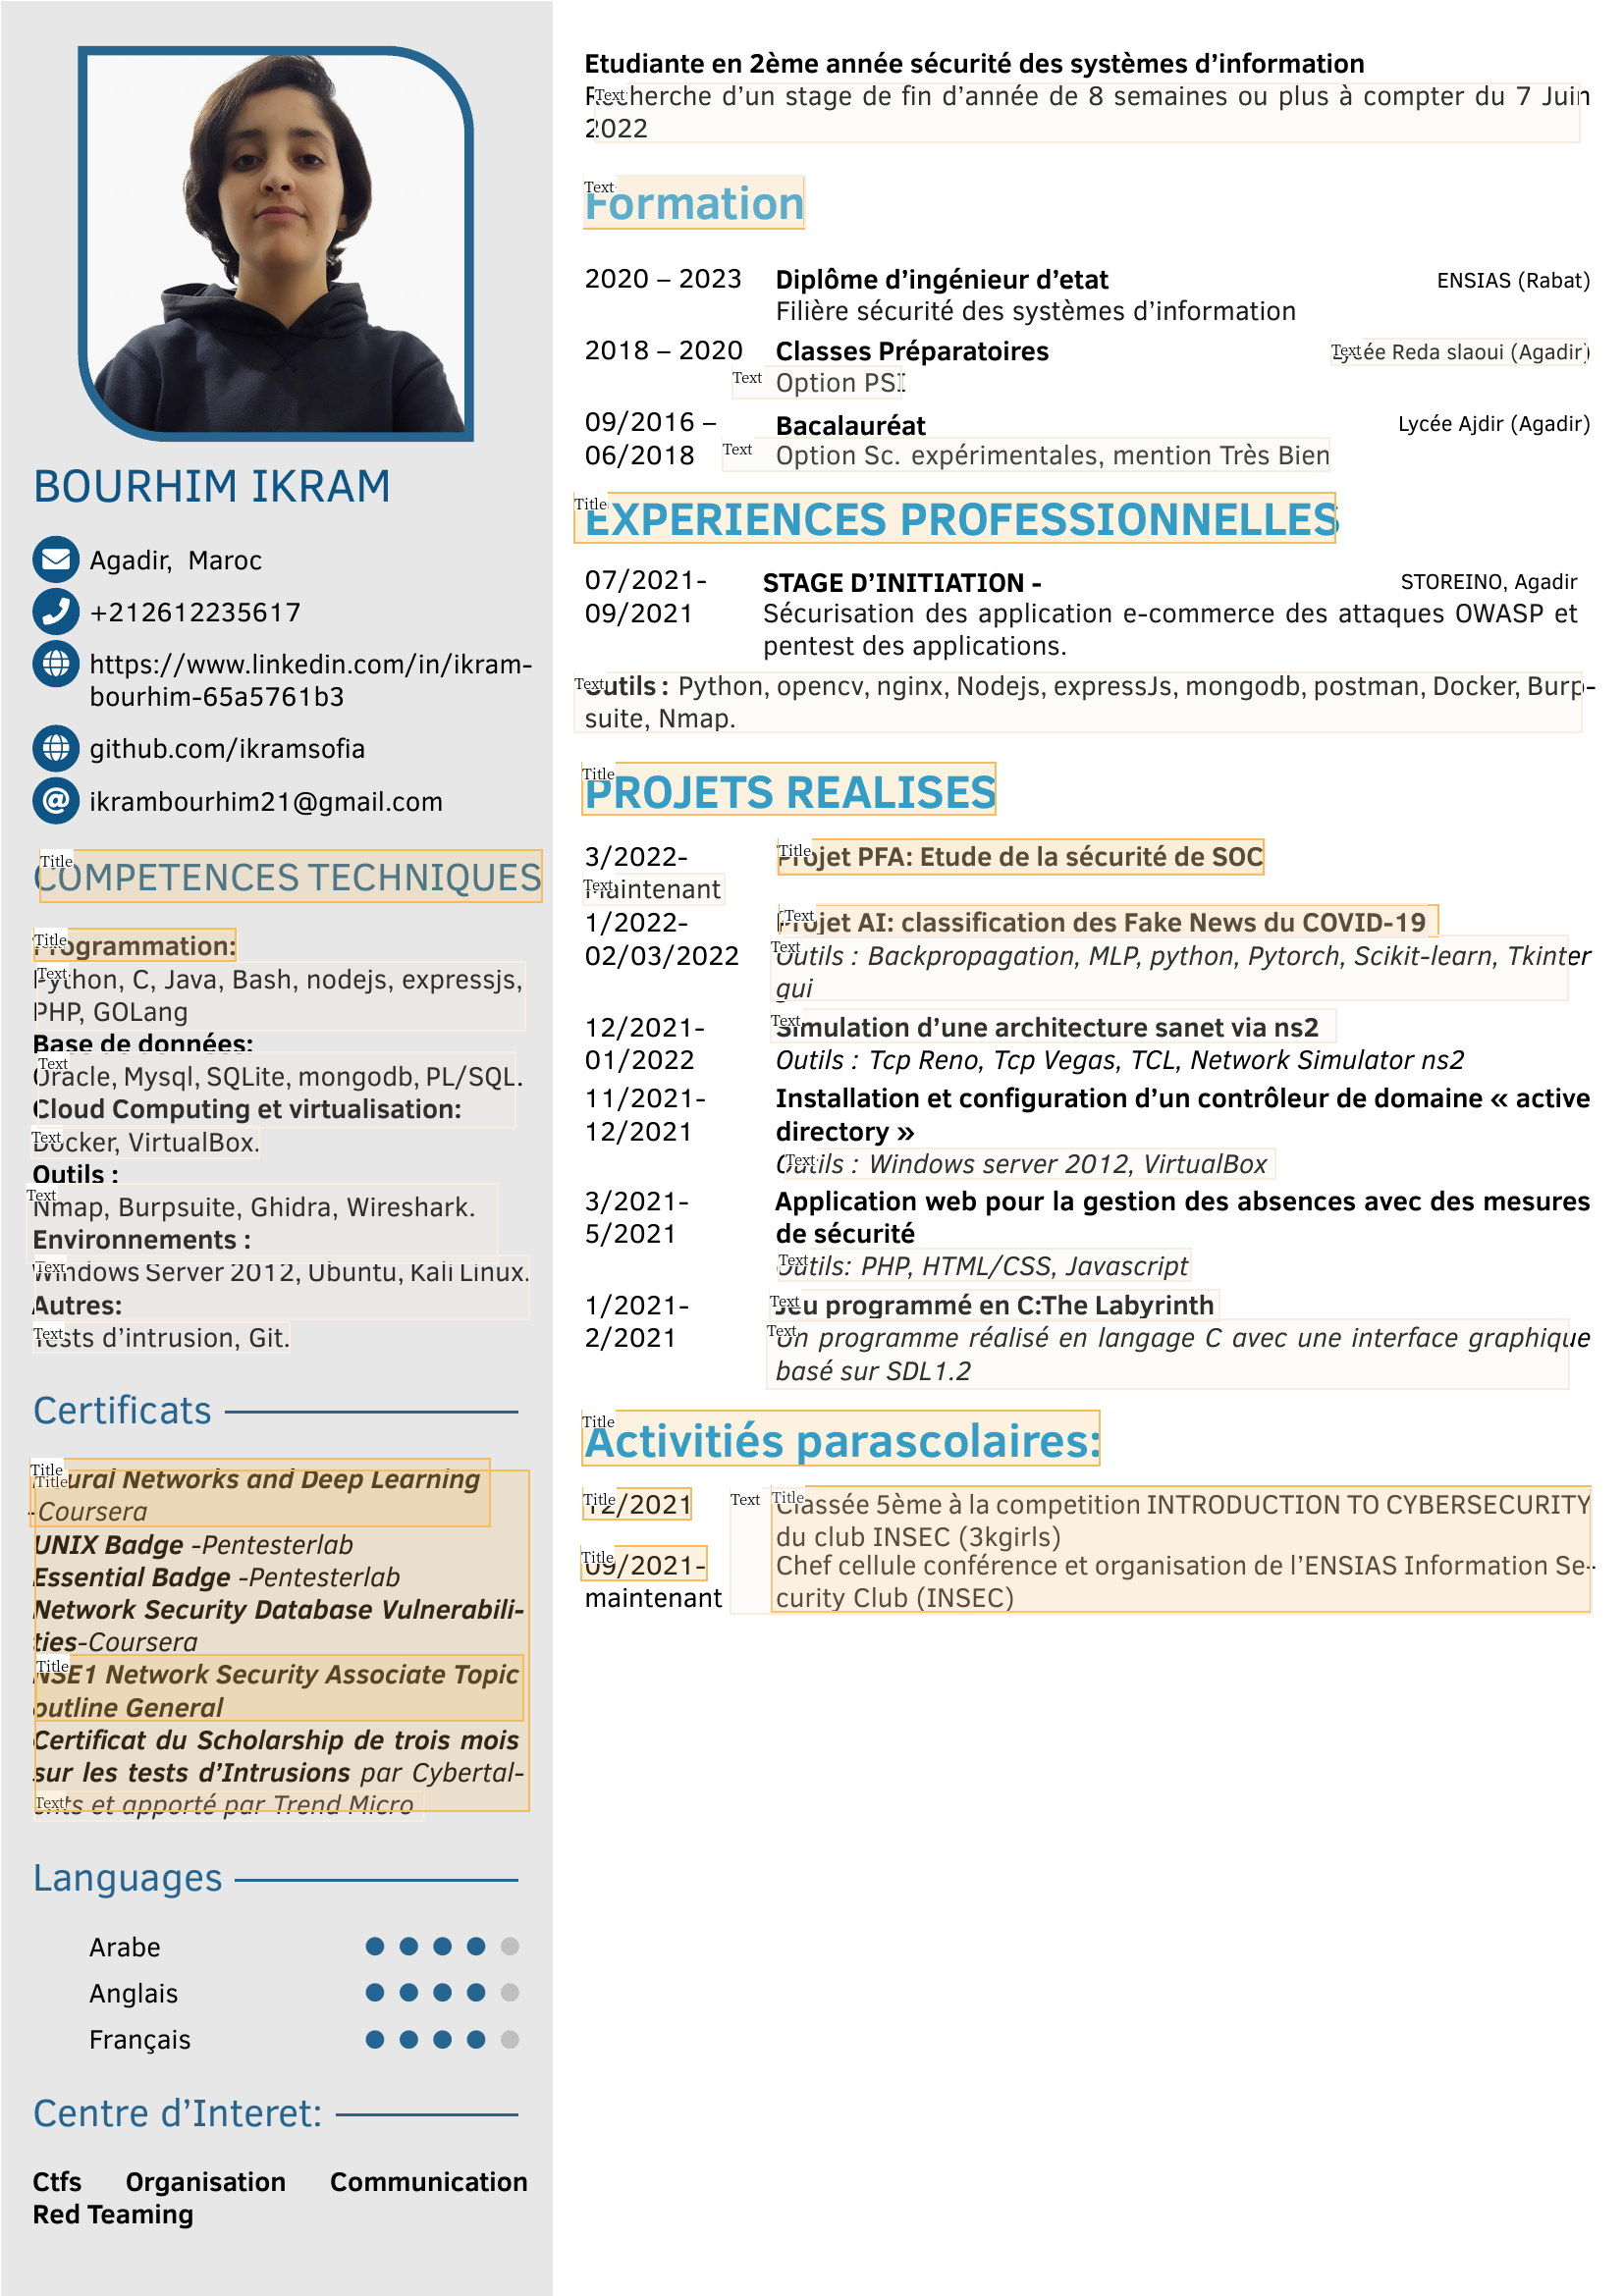

In [381]:
lp.draw_box(img, layout_result1,  box_width=2, box_alpha=0.2, show_element_type=True)

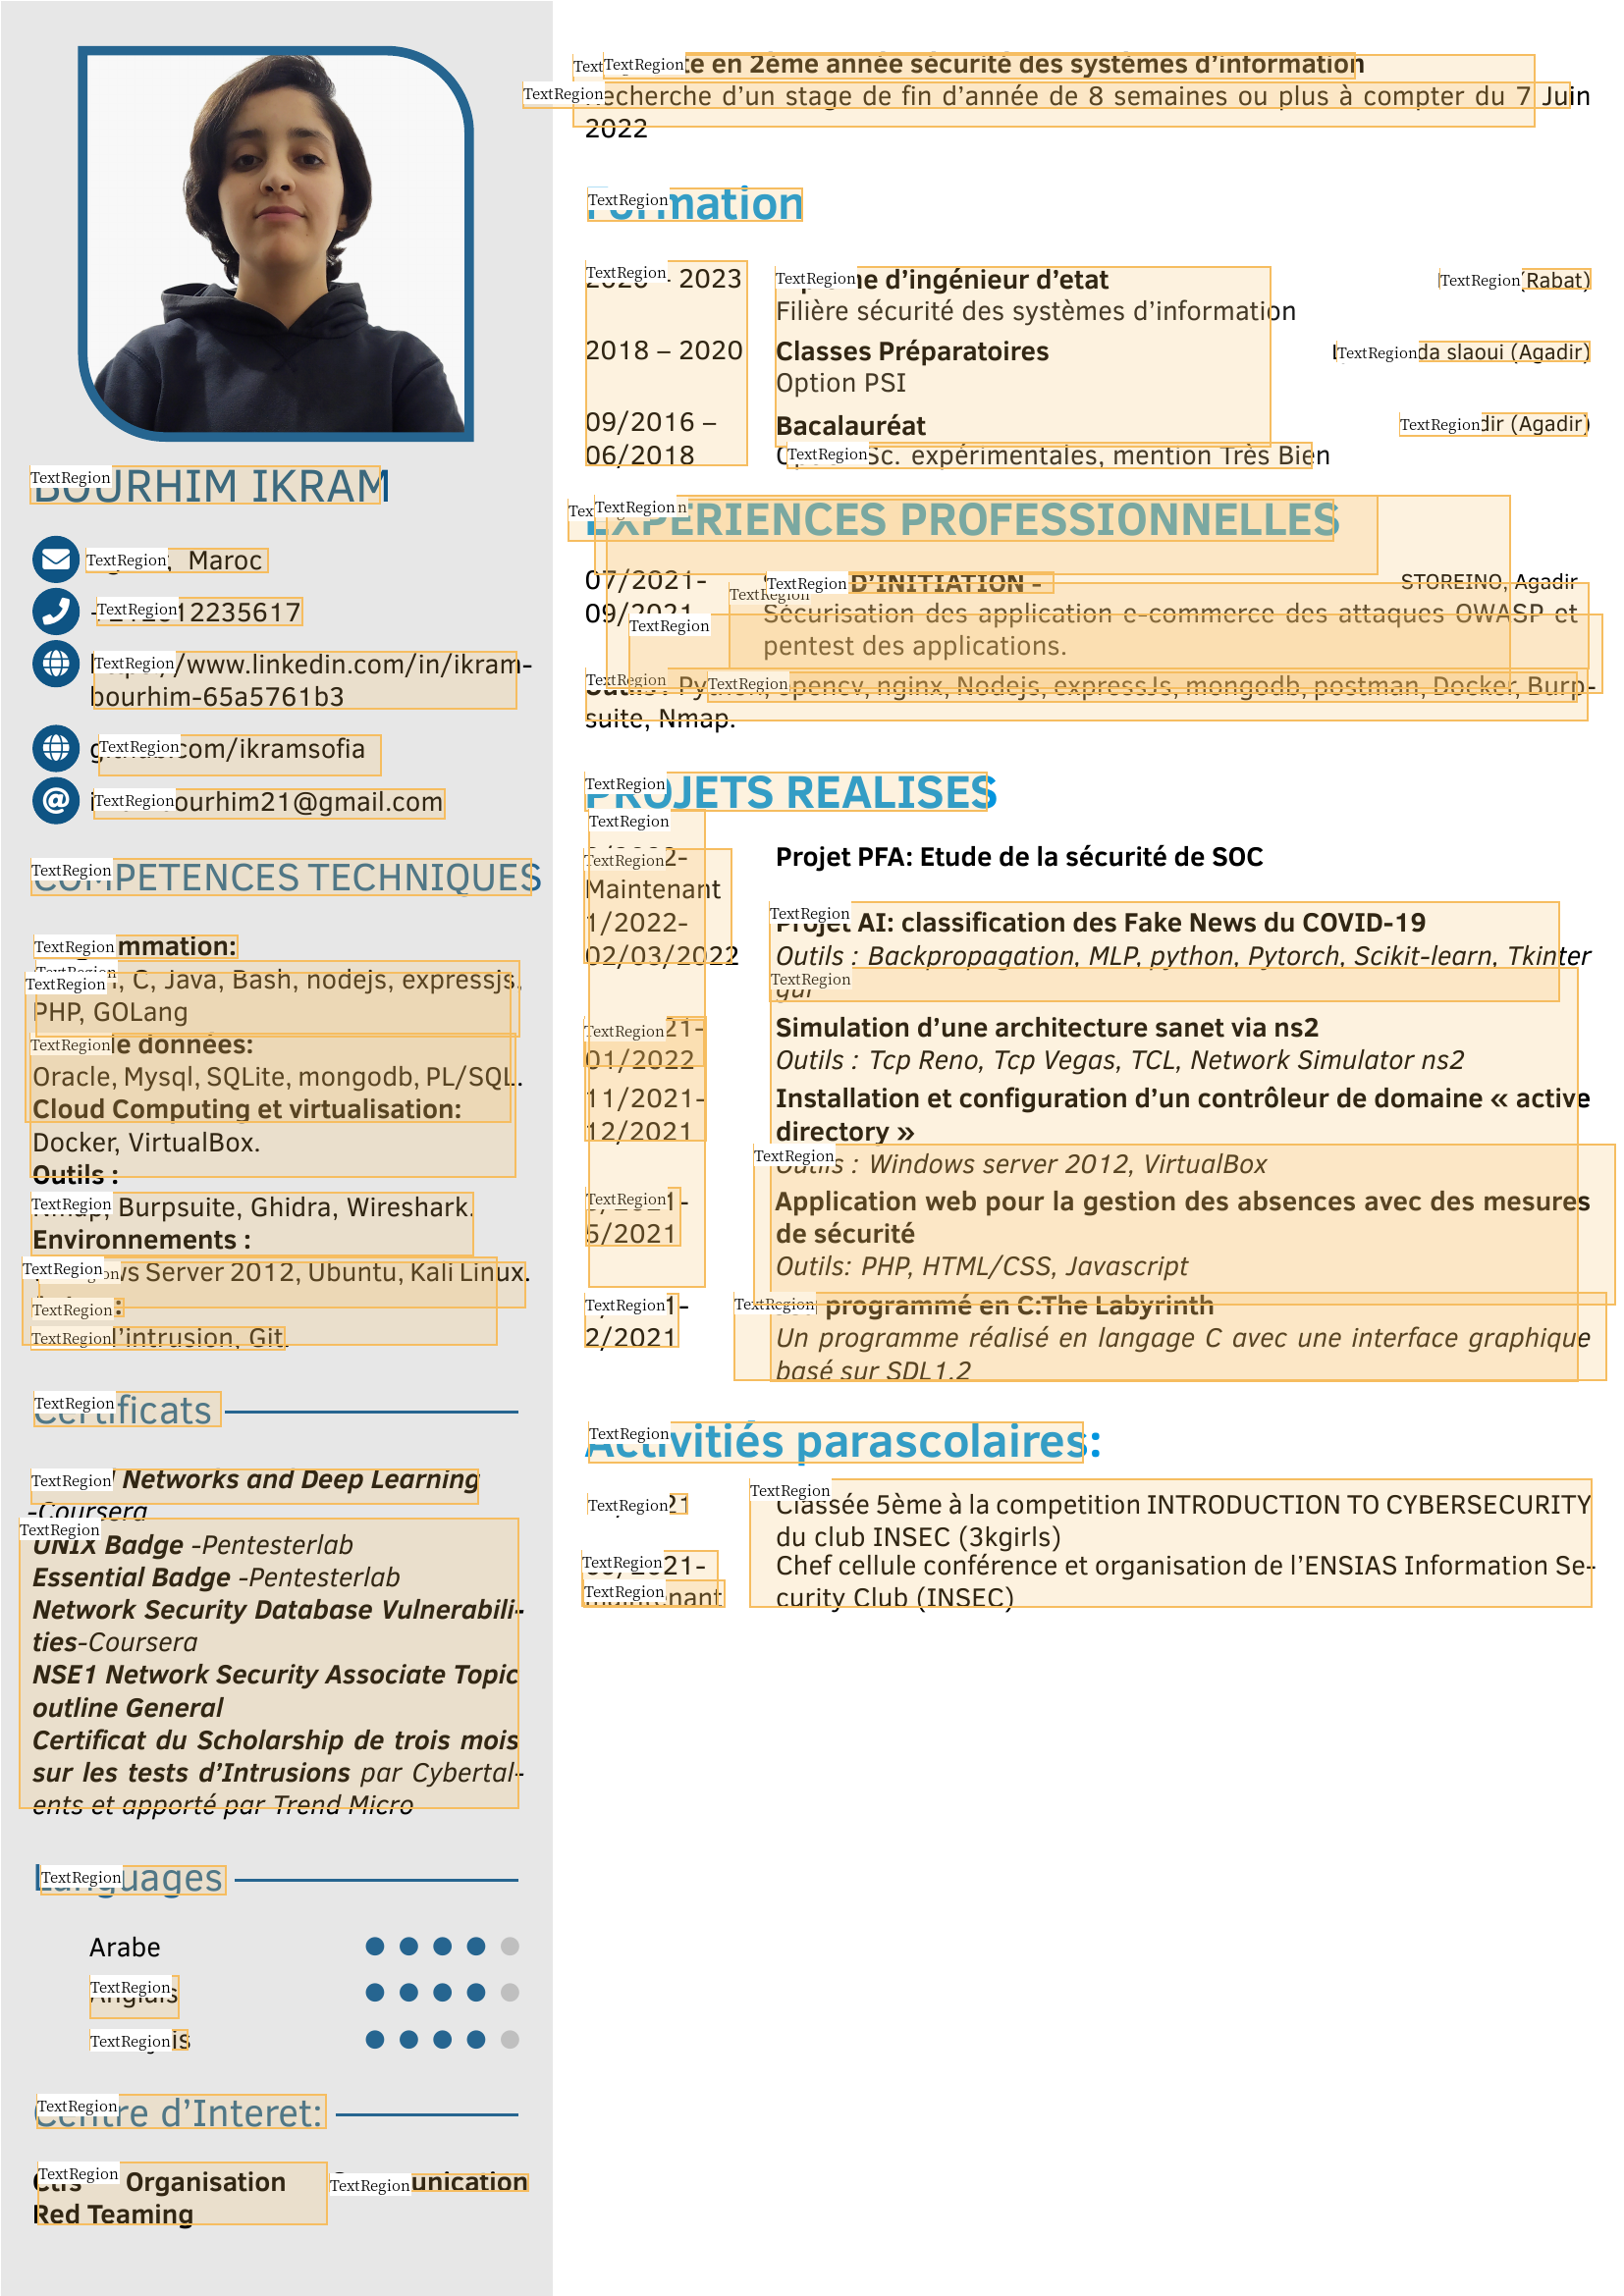

In [382]:
lp.draw_box(img, layout_result2,  box_width=2, box_alpha=0.2, show_element_type=True)

In [383]:
layout_result = layout_result1 + layout_result2

In [384]:
layout_result = union(layout_result)  

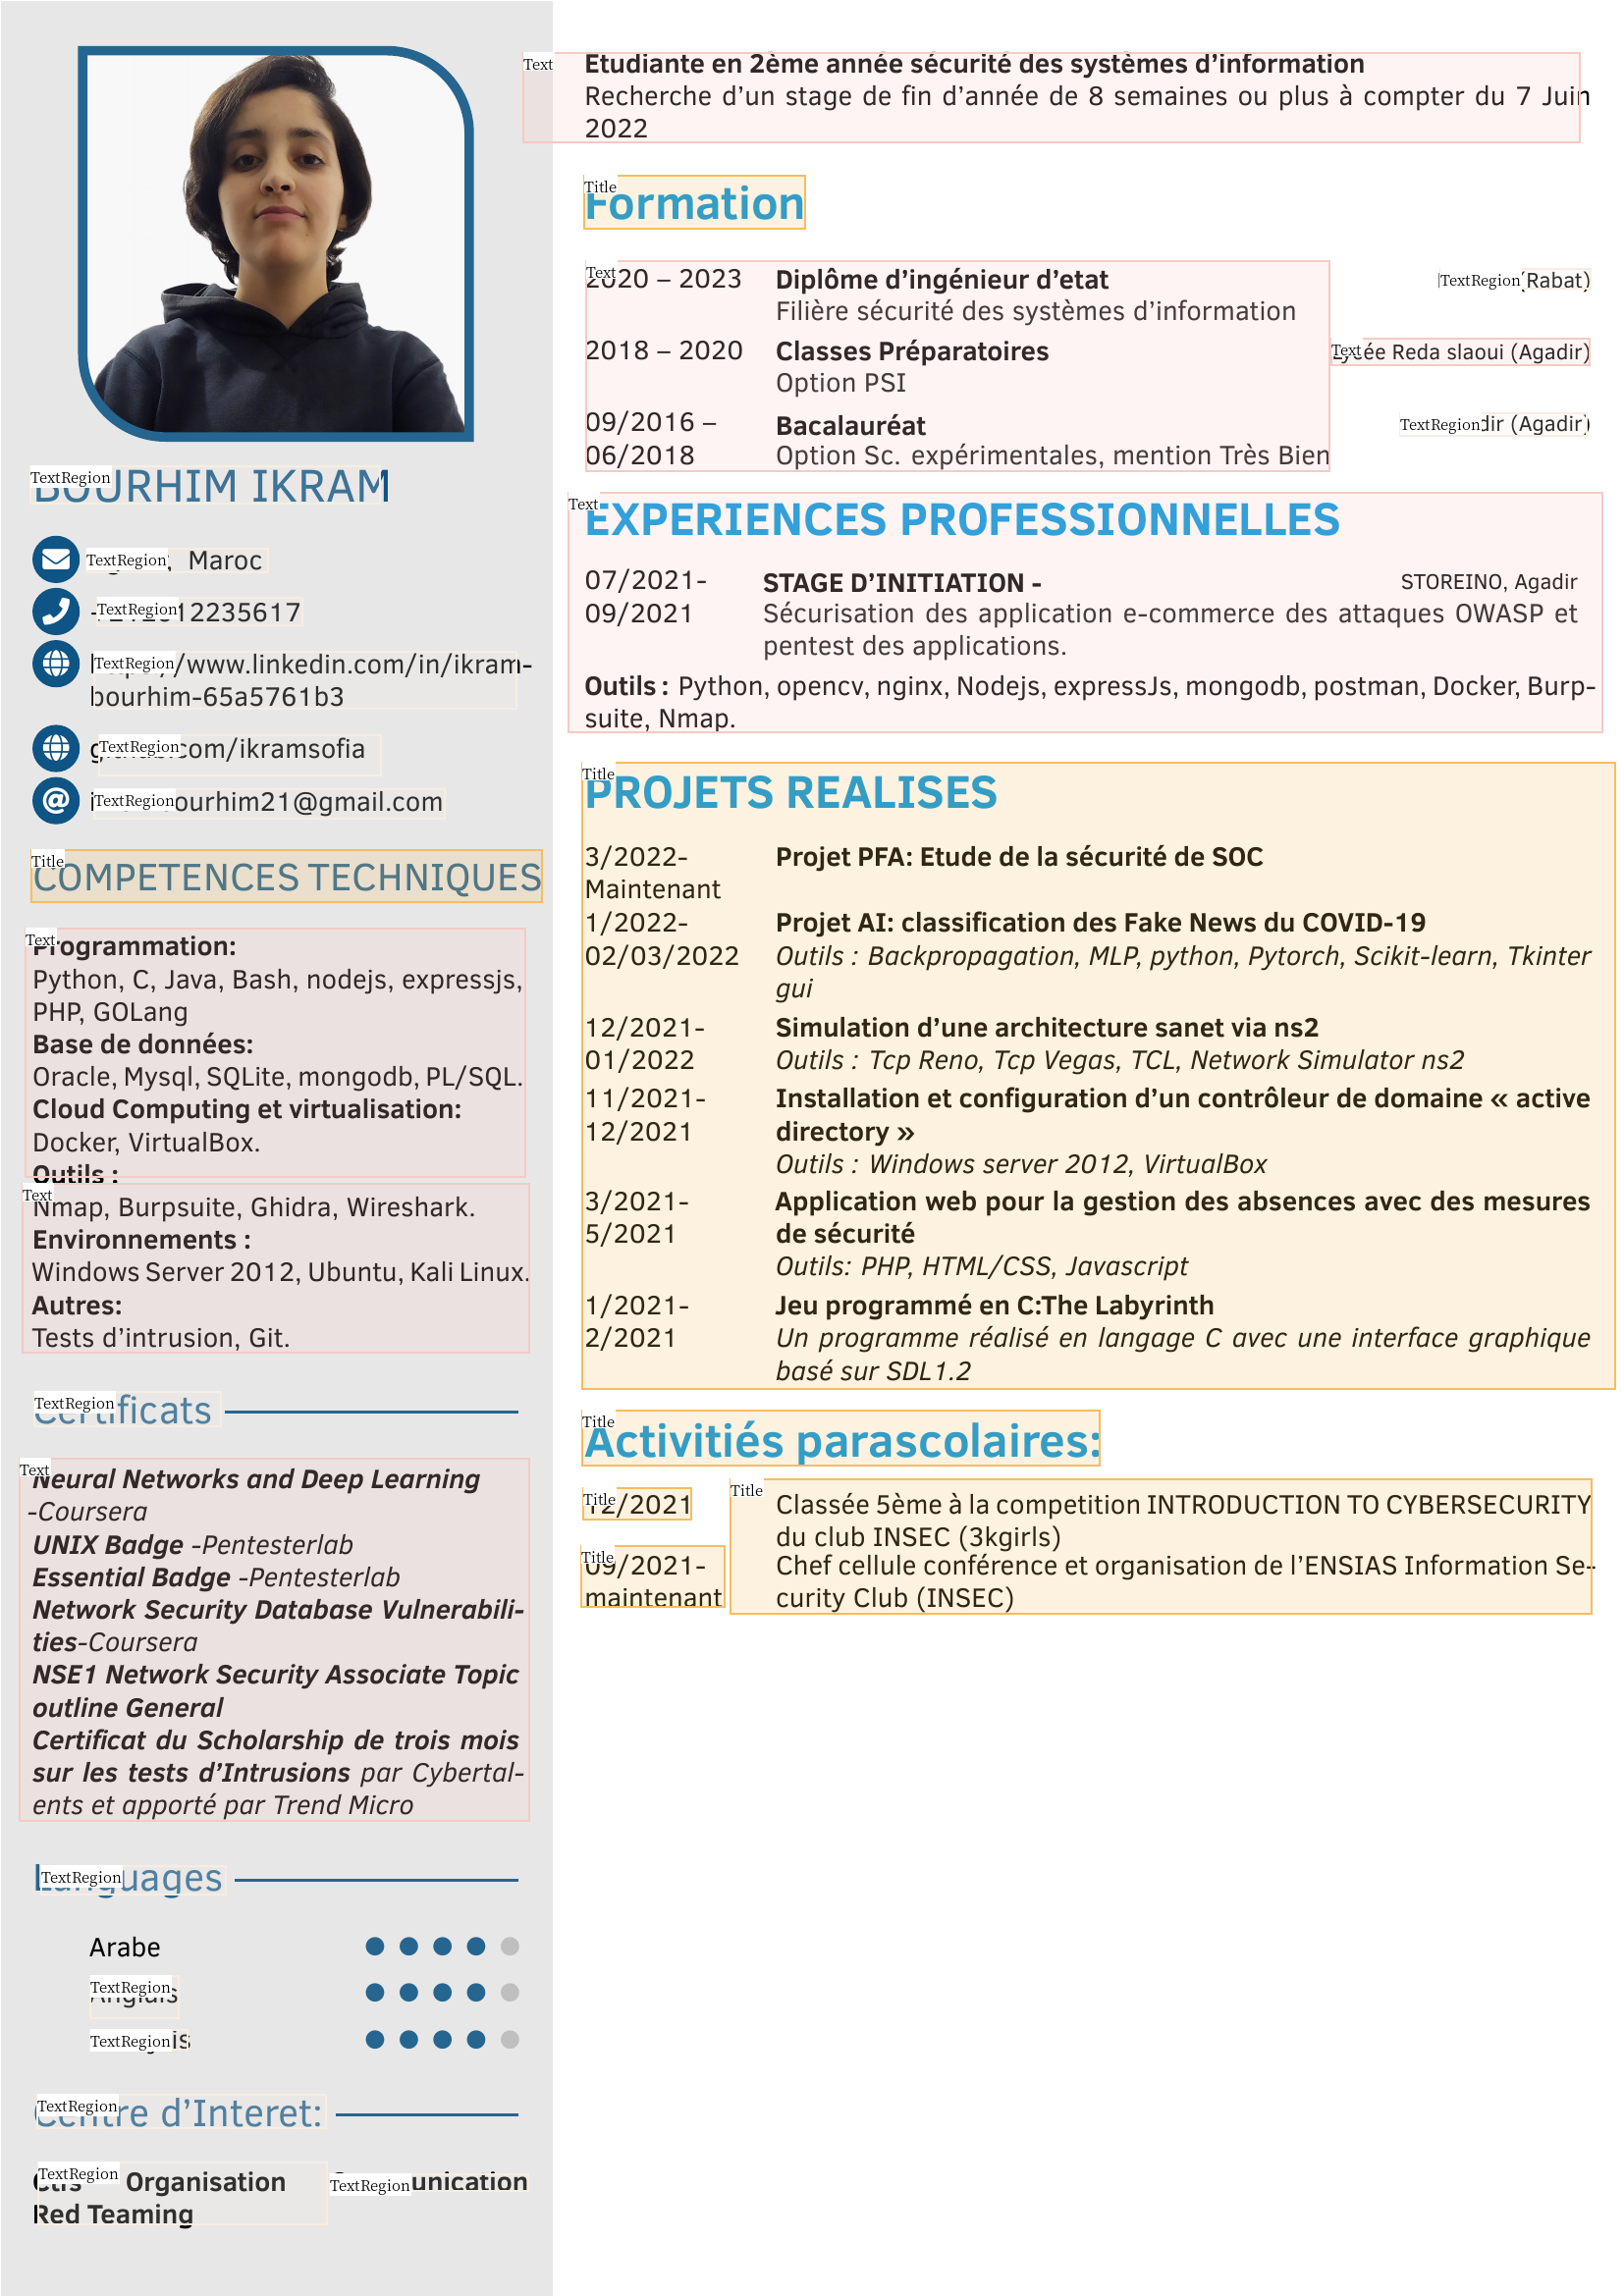

In [385]:
lp.draw_box(img, layout_result,  box_width=2, box_alpha=0.2, show_element_type=True)

In [386]:
text_blocks = lp.Layout([b for b in layout_result])

In [394]:
image_width = len(img[0])

# Sort element ID of the left column based on y1 coordinate
left_interval = lp.Interval(0, image_width/4, axis='x').put_on_canvas(img)
left_blocks = text_blocks.filter_by(left_interval, center=True)._blocks
left_blocks.sort(key = lambda b:b.coordinates[1])

# Sort element ID of the right column based on y1 coordinate
right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# Sort the overall element ID starts from left column
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [392]:
ocr_agent = lp.TesseractAgent()

In [393]:
for block in text_blocks:

    # Crop image around the detected layout
    segment_image = (block
                       .pad(left=15, right=15, top=5, bottom=5)
                       .crop_image(img))
    
    # Perform OCR
    text = ocr_agent.detect(segment_image)

    # Save OCR result
    block.set(text=text, inplace=True)

In [395]:
for txt in text_blocks :
    print(txt.text,"\n")

BOURHIM IKRAM
 

) Agadir, Maroc
 

+212612235617
 

https://www.linkedin.com/in/ikram-
bourhim-65a5761b3
 

github.com/ikramsofia
 

ikrambourhim21@gmail.com
 

COMPETENCES TECHNIQUES
 

Programmation:

Python, C, Java, Bash, nodejs, expressjs,
PHP, GOLang

Base de données:

Oracle, Mysql, SQLite, mongodb, PL/SQL.
Cloud Computing et virtualisation:
Docker, VirtualBox.

Outile -
 

Nmap, Burpsuite, Ghidra, Wireshark.
Environnements :

Windows Server 2012, Ubuntu, Kali Linux.
Autres:

Tests d’intrusion, Git.
 

Certificats -
 

Neural Networks and Deep Learning
-Coursera

UNIX Badge -Pentesterlab

Essential Badge -Pentesterlab

Network Security Database Vulnerabili-
ties-Coursera

NSE1 Network Security Associate Topic
outline General

Certificat du Scholarship de trois mois
sur les tests d’Intrusions par Cybertal-
ents et apporté par Trend Micro
 

Languages -
 

Anglais
 

Francais
 

Centre d’Interet: -
 

Ctfs Organisation
Red Teaming
 

Etudiante en 2éme année sécuri

In [399]:
from googletrans import Translator

translator = Translator()

full = ""

for txt in text_blocks:
    
    try :

        text = translator.translate(txt.text).text
        
        full = full + text + "\n"

        print(text, end='\n\n')
    
    except : pass

Burham Ikram

) Agadir, Morocco

+212612235617

You will be: //
Bohrem-65 Akhtah 1

ikrambourhim21@gmail.com

COMPETENCES TECHNIQUES

Programmation:

Python, c, java, bash, nodejs, ExpressJs,
Php, golang

BANK THE DESTICE:

Oracle, mysql, sqlite, mongodb, pl / sql.
Cloud Computing It Virtualisation:
Docker, virtual box.

Outlines -

NMAP, Burpsuit, Ghidra, Wireshark.
Environment:

Windows Server 2012, Ubuntu, Kali Linux.
Others:

Intrusion tests, git.

Certificates -

Neural Networks and Deep Learning
-Coursera

UNIX Badge -Pantsterlab

Essential Badge -Pantsterlab

Network Security Database Vulnerabili-
Ties-Coursera

NSE1 Network Security Associate Topic
Outline General

Three -month -old scholarship certificate
On cybertal intrusions tests
Ents and brought by Trend Micro

Languages -

English

Francais

Center of interest: -

Ctfs Organisation
Red Teaming

Student in 2nd year Safety of Information Systems
Search for an end -of -year internship of June 7
2022

Formation

2020 - 2023 

In [400]:
text = ocr_agent.detect(img)

In [401]:
print(text)

 

BOURHIM IKRAM

© Agadir, Maroc

©) +212612235617

 

 

 

 

 

 

https://www.linkedin.com/in/ikram-
bourhim-65a5761b3

github.com/ikramsofia

© ikrambourhim21@gmail.com

COMPETENCES TECHNIQUES

Programmation:

Python, C, Java, Bash, nodejs, expressjs,

PHP, GOLang
Base de données:

Oracle, Mysql, SQLite, mongodb, PL/SQL.
Cloud Computing et virtualisation:

Docker, VirtualBox.
Outils :

Nmap, Burpsuite, Ghidra, Wireshark.

Environnements :

Windows Server 2012, Ubuntu, Kali Linux.

Autres:
Tests d’intrusion, Git.

Certificats

Neural Networks and Deep Learning

-Coursera

UNIX Badge -Pentesterlab
Essential Badge -Pentesterlab
Network Security Database Vulnerabili-

ties-Coursera

NSE1 Network Security Associate Topic

outline General

Certificat du Scholarship de trois mois
sur les tests d’Intrusions par Cybertal-
ents et apporté par Trend Micro

Languages

Arabe
Anglais
Francais

Centre d’Interet:

Ctfs Organisation
Red Teaming

Communication

Etudiante en 2éme année sécurité des

In [402]:
import stanza
from stanza.server import CoreNLPClient

In [414]:
text = '''

Ikram BOURHIM.

Agadir.

Morocco.

0612235617.

https://www.linkedin.com/in/ikram-bourhim-65a5761b3.

github.com/ikramsofia.

ikrambourhim21@gmail.com.

Student in second year Safety of Information Systems Search for an end-of-year internship of June 7th 2022.

'''


with CoreNLPClient(
        
        annotators = ['tokenize','ssplit','pos','lemma','ner'],
        timeout    = 30000,
        memory     = '8G',
        threads    = '4',
        be_quiet   = False

                            ) as client:
    
    ann = client.annotate(text,output_format='json')

2022-06-17 15:21:46 INFO: Writing properties to tmp file: corenlp_server-1270619dff7e4eb7.props
2022-06-17 15:21:46 INFO: Starting server with command: java -Xmx8G -cp /home/socrates/stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 30000 -threads 4 -maxCharLength 100000 -quiet False -serverProperties corenlp_server-1270619dff7e4eb7.props -annotators tokenize,ssplit,pos,lemma,ner -preload -outputFormat serialized
[main] INFO CoreNLP - --- StanfordCoreNLPServer#main() called ---
[main] INFO CoreNLP - Server default properties:
			(Note: unspecified annotator properties are English defaults)
			annotators = tokenize,ssplit,pos,lemma,ner
			inputFormat = text
			outputFormat = serialized
			prettyPrint = false
			threads = 4
[main] INFO CoreNLP - Threads: 4
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.

  Ikram BOURHIM.  Agadir.  Morocco.  0612235617.  https://www.linkedin.com/in/ikram-bourhim-65a5761b3.  github.com/ikramsofia.  ikrambourhim21@gmail.com.  Student in second year Safety of Information Systems Search for an end-of-year internship of June 7th 2022.  


[Thread-0] INFO CoreNLP - CoreNLP Server is shutting down.


In [415]:
for sen in ann['sentences']:
    for ent in sen['entitymentions']:
        print(ent['text'],"------>",ent['ner'],"\n")

Ikram BOURHIM ------> PERSON 

Morocco ------> COUNTRY 

0612235617 ------> NUMBER 

https://www.linkedin.com/in/ikram-bourhim-65a5761b3 ------> URL 

ikrambourhim21@gmail.com ------> EMAIL 

Student ------> TITLE 

second year ------> DATE 

June 7th 2022 ------> DATE 



In [4]:
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
nlp = spacy.load("en_core_web_sm")
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

# extract skills from job_description
job_description = """

COMPETENCES TECHNIQUES.

Programmation:

Python, c, java, bash, nodejs, ExpressJs,
Php, golang.

BANK THE DESTICE:

Oracle, mysql, sqlite, mongodb, pl / sql.
Cloud Computing It Virtualisation:
Docker, virtual box.

Outlines -

NMAP, Burpsuit, Ghidra, Wireshark.
Environment:

Windows Server 2012, Ubuntu, Kali Linux.
Others:

Intrusion tests, git.

Certificates -

Neural Networks and Deep Learning
-Coursera

UNIX Badge -Pantsterlab

Essential Badge -Pantsterlab

Network Security Database Vulnerabili-
Ties-Coursera

NSE1 Network Security Associate Topic
Outline General

Three-month-old scholarship certificate
On cybertal intrusions tests
Ents and brought by Trend Micro

Languages -

Arabic.

English.

French.

Center of interest: -

Ctfs Organisation

Red Teaming

Formation

State engineer diploma

Safety Safety Filiere Information Systems

PROFESSIONAL EXPERIENCE

Initiation internship - Storeino, Agadir

Securing e-commerce application of OWASP attacks and
Application Pantest.

Tools: Python, OpenCV, Nginx, Nodejs, ExpressJs, Mongodb, Postman, Docker, Burp-

Continuation, nmap.

FINALISED PROJECT

PFA project: SOC security study

AI project: COVVI-19 FAKE NEWS CLASSIFICATION

Tools: Backpropagation, MLP, Python, Pytorch, Scikit-Learn, Tkinter
mistletoe

Simulation of a Sanet architecture via NS2

Tools: TCP Reno, TCP Vegas, TCL, Network Simulator NS2
Installation and configuration of a domain set "active
Directory "

Tools: Windows Server 2012, VirtualBox

Web application for the management of absences with measures
of security

Tools: PHP, HTML/CSS, JavaScript

Game programmed in C: The Labyrinth

A program carried out in C language with a graphical interface
Based on SDL1.2

Extracurricular activities:

Classified 5th to the Competition Introduction to cybersecurity
of the Insec club (3kgirls)

Chief conference unit and organization of ENSIAS Information se-
Curity Club (INSEC)

Communication

"""

annotations = skill_extractor.annotate(job_description)

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


In [5]:
skill_extractor.describe(annotations)